In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv

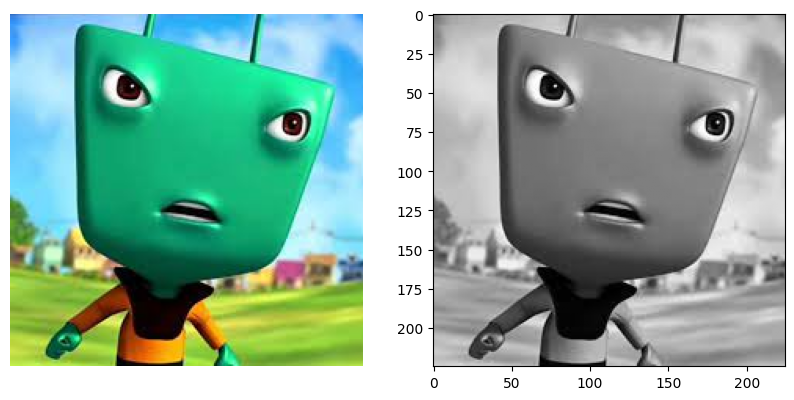

In [65]:
adudu = plt.imread('Assets/adudu.jpg')
adudu_gray = cv.imread('Assets/adudu.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(adudu, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(adudu_gray, cmap='gray')

In [66]:
def pad_image(img, pad):
    h, w = img.shape
    new_h = h + 2 * pad
    new_w = w + 2 * pad
    padded = np.zeros((new_h, new_w), dtype=np.uint8)
    padded[pad:pad+h, pad:pad+w] = img
    return padded

In [67]:
def hitung_mean(img, k):
    pad = k // 2
    img_pad = pad_image(img, pad)  # tambahkan padding
    h, w = img.shape
    output = np.zeros((h, w), dtype=np.uint8)

    for i in range(h):
        for j in range(w):
            total = 0
            for dx in range(k):
                for dy in range(k):
                    total += int(img_pad[i + dx, j + dy])
            output[i, j] = total // (k * k)
    return output

In [68]:
def cari_median(img, k):
    pad = k // 2
    h, w = img.shape
    img_pad = pad_image(img, pad)
    output = np.zeros((h, w), dtype=np.uint8)

    for i in range(h):
        for j in range(w):
            values = []
            for dx in range(k):
                for dy in range(k):
                    values.append(int(img_pad[i + dx, j + dy]))
            
            # Urutkan manual (bubble sort)
            for x in range(len(values)):
                for y in range(x + 1, len(values)):
                    if values[x] > values[y]:
                        values[x], values[y] = values[y], values[x]

            mid = len(values) // 2
            output[i, j] = values[mid]
    return output

In [69]:
def cari_modus(img, k):
    pad = k // 2
    h, w = img.shape
    img_pad = pad_image(img, pad)
    output = np.zeros((h, w), dtype=np.uint8)

    for i in range(h):
        for j in range(w):
            frekuensi = {}
            for dx in range(k):
                for dy in range(k):
                    nilai = int(img_pad[i + dx, j + dy])
                    if nilai in frekuensi:
                        frekuensi[nilai] += 1
                    else:
                        frekuensi[nilai] = 1

            # Cari nilai dengan frekuensi terbanyak
            max_freq = -1
            mode_val = 0
            for val in frekuensi:
                if frekuensi[val] > max_freq:
                    max_freq = frekuensi[val]
                    mode_val = val

            output[i, j] = mode_val
    return output

In [70]:
kernel_smoothing = np.array([[1/10, 1/10, 1/10], [1/10, 1/5, 1/10], [1/10, 1/10, 1/10]], dtype=np.float32)
kernel_sharpening = np.array([[1/9, 1/9, 1/9], [1/9, 8/9, 1/9], [1/9, 1/9, 1/9]], dtype=np.float32)

In [71]:
def apply_kernel(img, kernel, padding):
    def konvolusi(image, kernel, padding):
        # Ukuran gambar dan kernel
        image_height = len(image)
        image_width = len(image[0])
        kernel_height = len(kernel)
        kernel_width = len(kernel[0])

        # Menambahkan padding pada gambar
        padded_image = [[0 for _ in range(image_width + 2 * padding)] for _ in range(image_height + 2 * padding)]
        for i in range(image_height):
            for j in range(image_width):
                padded_image[i + padding][j + padding] = image[i][j]

        # Ukuran output (dengan padding)
        output_height = image_height + 2 * padding - kernel_height + 1
        output_width = image_width + 2 * padding - kernel_width + 1

        # Inisialisasi hasil konvolusi
        output = [[0 for _ in range(output_width)] for _ in range(output_height)]

        # Proses konvolusi
        for i in range(output_height):
            for j in range(output_width):
                total = 0
                for m in range(kernel_height):
                    for n in range(kernel_width):
                        total += padded_image[i + m][j + n] * kernel[m][n]
                output[i][j] = total

        return output

    return konvolusi(img, kernel, padding)

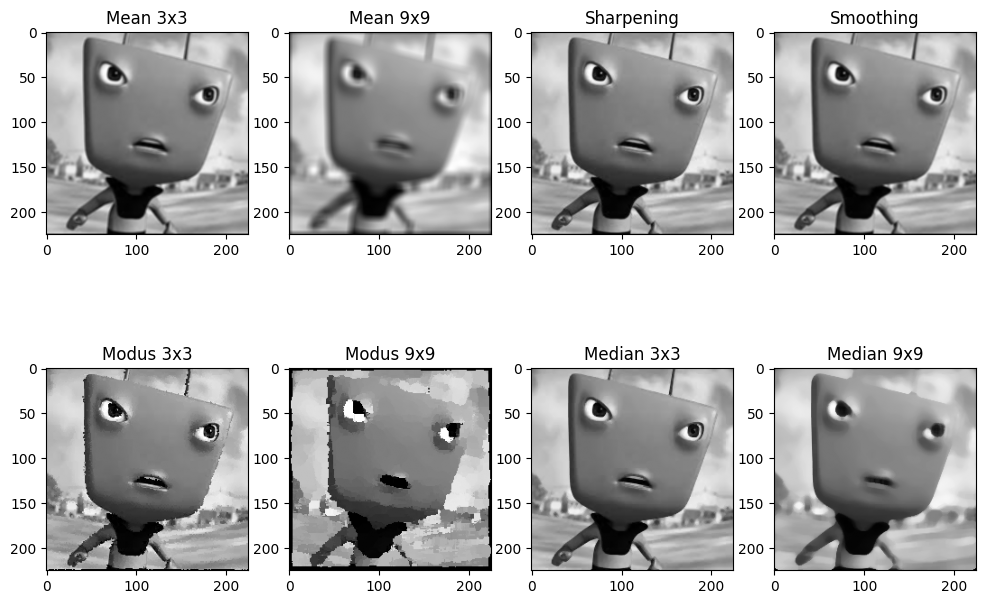

In [72]:
mean3 = hitung_mean(adudu_gray, k=3)
mean9 = hitung_mean(adudu_gray, k=9)
median3 = cari_median(adudu_gray, k=3)
median9 = cari_median(adudu_gray, k=9)
modus3 = cari_modus(adudu_gray, k=3)
modus9 = cari_modus(adudu_gray, k=9)
smoothing = np.array(apply_kernel(adudu_gray, kernel_smoothing, padding=1))
sharpening = np.array(apply_kernel(adudu_gray, kernel_sharpening, padding=1))

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title("Mean 3x3")
plt.imshow(mean3, cmap='gray')

plt.subplot(2, 4, 2)
plt.title("Mean 9x9")
plt.imshow(mean9, cmap='gray')

plt.subplot(2, 4, 3)
plt.title("Sharpening")
plt.imshow(sharpening, cmap='gray')

plt.subplot(2, 4, 4)
plt.title("Smoothing")
plt.imshow(smoothing, cmap='gray')

plt.subplot(2, 4, 5)
plt.title("Modus 3x3")
plt.imshow(modus3, cmap='gray')

plt.subplot(2, 4, 6)
plt.title("Modus 9x9")
plt.imshow(modus9, cmap='gray')

plt.subplot(2, 4, 7)
plt.title("Median 3x3")
plt.imshow(median3, cmap='gray')

plt.subplot(2, 4, 8)
plt.title("Median 9x9")
plt.imshow(median9, cmap='gray')

In [73]:
Sobelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
Sobely = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) 

Prewittx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) 
Prewitty = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) 

Robertx = np.array([[1, 0,], [0, -1]])
Roberty = np.array([[0, 1], [-1, 0]])

In [74]:
def konvolusi(image, kernel, padImg):
    result = np.zeros([image.shape[0], image.shape[1]])

    # Ukuran kernel
    kernel_height, kernel_width = kernel.shape

    # Iterasi untuk setiap piksel pada gambar
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Perhitungan konvolusi untuk setiap area kecil pada gambar
            for k in range(kernel_height):
                for l in range(kernel_width):
                    result[i, j] += padImg[i + k, j + l] * kernel[k, l]

    return result

In [75]:
def cariGradient (image, kernel): 
    centerx, centery = int((kernel.shape[0] - 1)/2), int((kernel.shape[1] - 1)/2)
    padImg =  np.pad(array = image, pad_width = ((centerx, kernel.shape[0]-1-centerx), (centery, kernel.shape[1]-1-centery)), mode ="constant") 
    return konvolusi(image, kernel, padImg)

In [76]:
def deteksiTepi(image, kernelx, kernely):
  resultx = cariGradient(image, kernelx)
  resulty = cariGradient(image, kernely)
  result = abs(resultx) + abs(resulty)
  return result

Text(0.5, 1.0, 'Sobel Median 9x9')

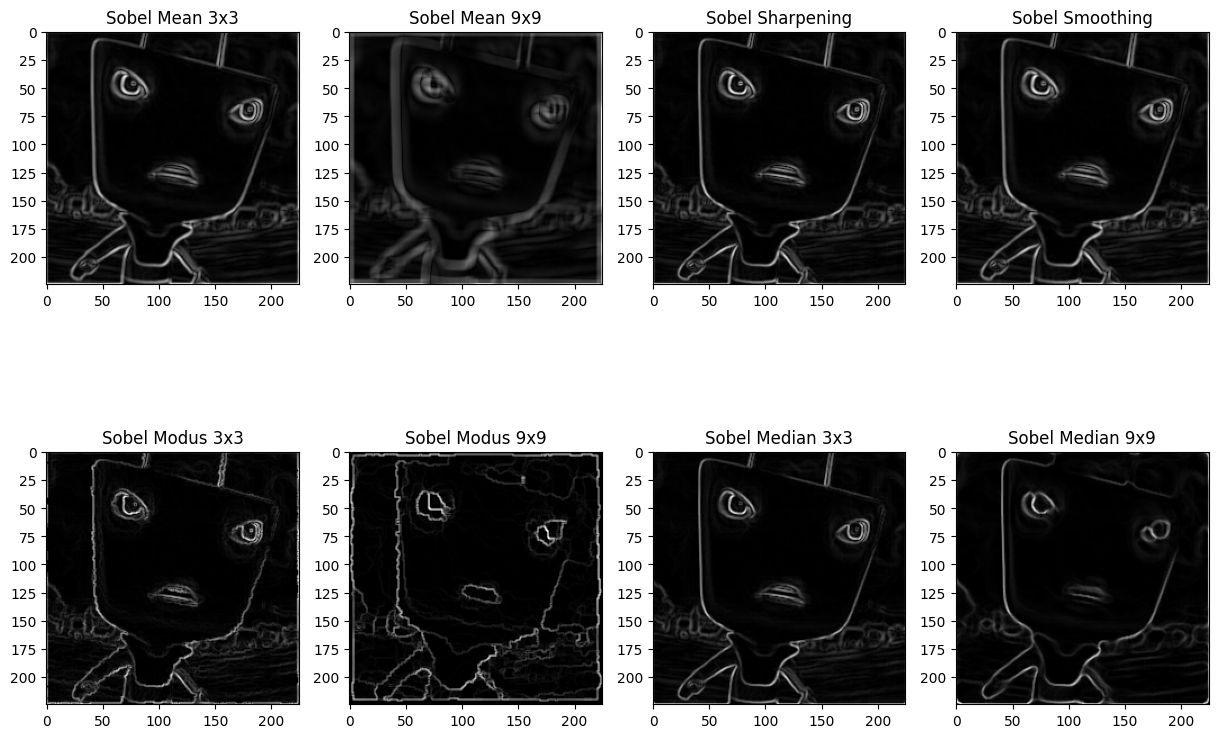

In [77]:
sobelMean3 = deteksiTepi(mean3, Sobelx, Sobely)
sobelMean9 = deteksiTepi(mean9, Sobelx, Sobely)
sobelModus3 = deteksiTepi(modus3, Sobelx, Sobely)
sobelModus9 = deteksiTepi(modus9, Sobelx, Sobely)
sobelMedian3 = deteksiTepi(median3, Sobelx, Sobely)
sobelMedian9 = deteksiTepi(median9, Sobelx, Sobely)
sobelSharpening = deteksiTepi(sharpening, Sobelx, Sobely)
sobelSmoothing = deteksiTepi(smoothing, Sobelx, Sobely)

plt.figure(figsize=(15, 10))

plt.subplot(2,4,1)
plt.imshow(sobelMean3, cmap='gray')
plt.title('Sobel Mean 3x3')

plt.subplot(2,4,2)
plt.imshow(sobelMean9, cmap='gray')
plt.title('Sobel Mean 9x9')

plt.subplot(2,4,3)
plt.imshow(sobelSharpening, cmap='gray')
plt.title('Sobel Sharpening')

plt.subplot(2,4,4)
plt.imshow(sobelSmoothing, cmap='gray')
plt.title('Sobel Smoothing')

plt.subplot(2,4,5)
plt.imshow(sobelModus3, cmap='gray')
plt.title('Sobel Modus 3x3')

plt.subplot(2,4,6)
plt.imshow(sobelModus9, cmap='gray')
plt.title('Sobel Modus 9x9')

plt.subplot(2,4,7)
plt.imshow(sobelMedian3, cmap='gray')
plt.title('Sobel Median 3x3')

plt.subplot(2,4,8)
plt.imshow(sobelMedian9, cmap='gray')
plt.title('Sobel Median 9x9')

Text(0.5, 1.0, 'Prewitt Median 9x9')

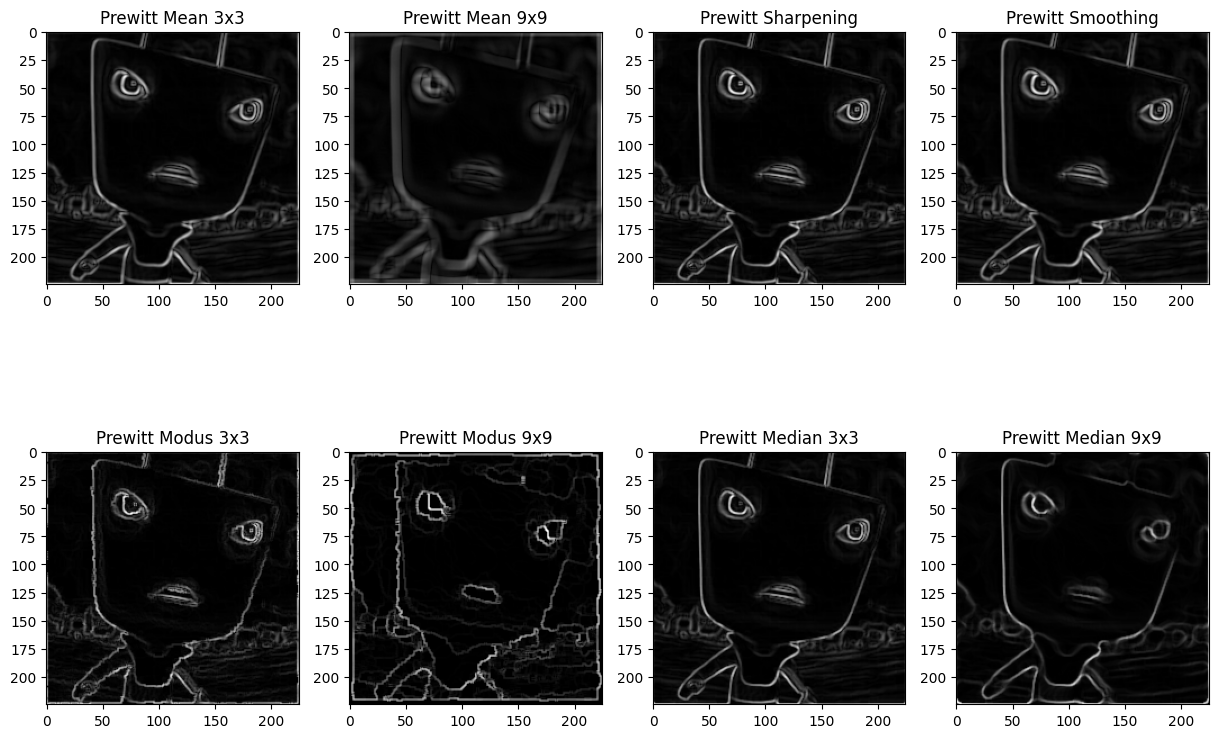

In [78]:
prewittMean3 = deteksiTepi(mean3, Prewittx, Prewitty)
prewittMean9 = deteksiTepi(mean9, Prewittx, Prewitty)
prewittModus3 = deteksiTepi(modus3, Prewittx, Prewitty)
prewittModus9 = deteksiTepi(modus9, Prewittx, Prewitty)
prewittMedian3 = deteksiTepi(median3, Prewittx, Prewitty)
prewittMedian9 = deteksiTepi(median9, Prewittx, Prewitty)
prewittSharpening = deteksiTepi(sharpening, Prewittx, Prewitty)
prewittSmoothing = deteksiTepi(smoothing, Prewittx, Prewitty)

plt.figure(figsize=(15, 10))

plt.subplot(2,4,1)
plt.imshow(prewittMean3, cmap='gray')
plt.title('Prewitt Mean 3x3')

plt.subplot(2,4,2)
plt.imshow(prewittMean9, cmap='gray')
plt.title('Prewitt Mean 9x9')

plt.subplot(2,4,3)
plt.imshow(prewittSharpening, cmap='gray')
plt.title('Prewitt Sharpening')

plt.subplot(2,4,4)
plt.imshow(prewittSmoothing, cmap='gray')
plt.title('Prewitt Smoothing')

plt.subplot(2,4,5)
plt.imshow(prewittModus3, cmap='gray')
plt.title('Prewitt Modus 3x3')

plt.subplot(2,4,6)
plt.imshow(prewittModus9, cmap='gray')
plt.title('Prewitt Modus 9x9')

plt.subplot(2,4,7)
plt.imshow(prewittMedian3, cmap='gray')
plt.title('Prewitt Median 3x3')

plt.subplot(2,4,8)
plt.imshow(prewittMedian9, cmap='gray')
plt.title('Prewitt Median 9x9')

Text(0.5, 1.0, 'Robert Median 9x9')

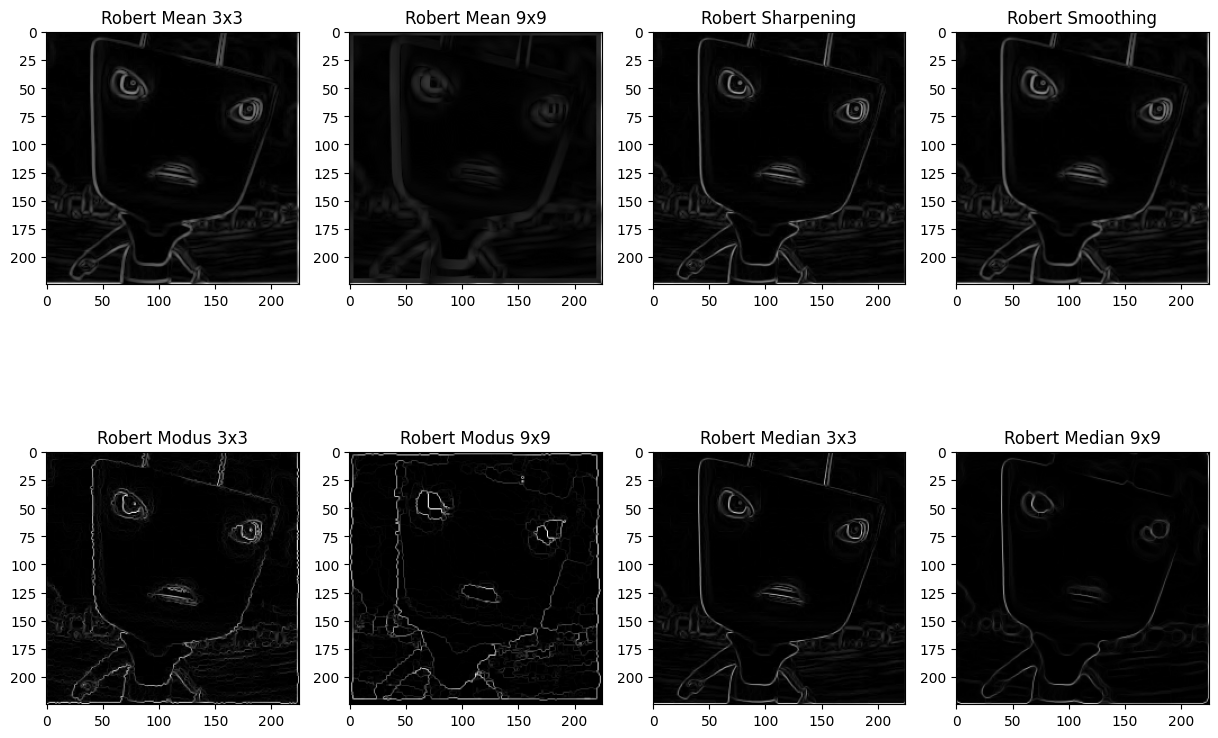

In [79]:
robertMean3 = deteksiTepi(mean3, Robertx, Roberty)
robertMean9 = deteksiTepi(mean9, Robertx, Roberty)
robertModus3 = deteksiTepi(modus3, Robertx, Roberty)
robertModus9 = deteksiTepi(modus9, Robertx, Roberty)
robertMedian3 = deteksiTepi(median3, Robertx, Roberty)
robertMedian9 = deteksiTepi(median9, Robertx, Roberty)
robertSharpening = deteksiTepi(sharpening, Robertx, Roberty)
robertSmoothing = deteksiTepi(smoothing, Robertx, Roberty)

plt.figure(figsize=(15, 10))

plt.subplot(2,4,1)
plt.imshow(robertMean3, cmap='gray')
plt.title('Robert Mean 3x3')

plt.subplot(2,4,2)
plt.imshow(robertMean9, cmap='gray')
plt.title('Robert Mean 9x9')

plt.subplot(2,4,3)
plt.imshow(robertSharpening, cmap='gray')
plt.title('Robert Sharpening')

plt.subplot(2,4,4)
plt.imshow(robertSmoothing, cmap='gray')
plt.title('Robert Smoothing')

plt.subplot(2,4,5)
plt.imshow(robertModus3, cmap='gray')
plt.title('Robert Modus 3x3')

plt.subplot(2,4,6)
plt.imshow(robertModus9, cmap='gray')
plt.title('Robert Modus 9x9')

plt.subplot(2,4,7)
plt.imshow(robertMedian3, cmap='gray')
plt.title('Robert Median 3x3')

plt.subplot(2,4,8)
plt.imshow(robertMedian9, cmap='gray')
plt.title('Robert Median 9x9')

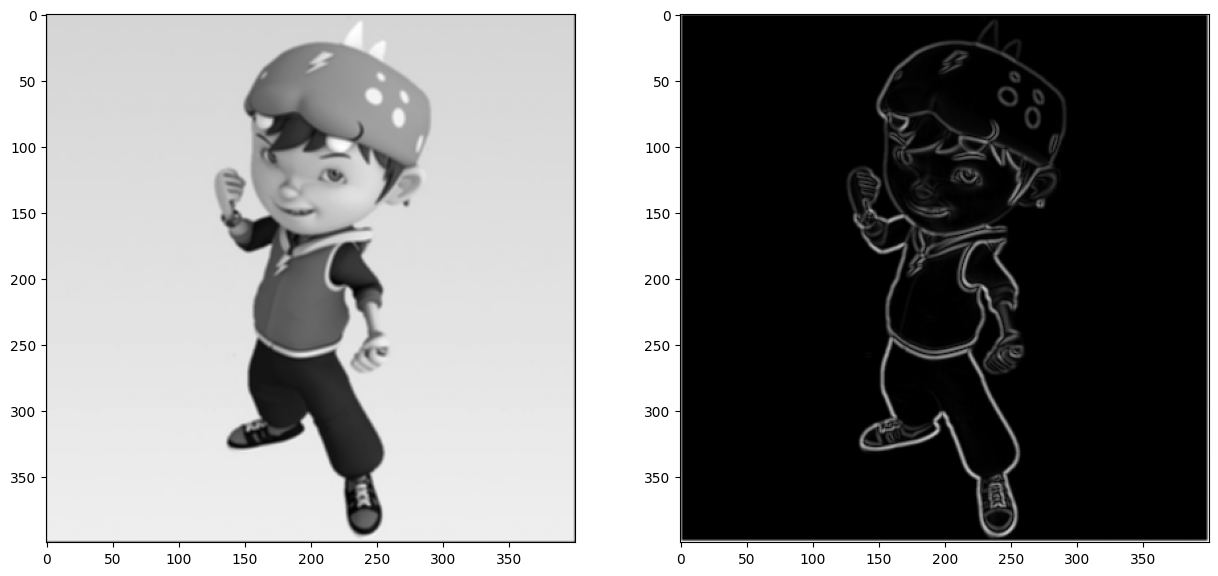

In [80]:
boboiboy = plt.imread('Assets/boboiboy.jpg')
boboiboy_gray = cv.imread('Assets/boboiboy.jpg', cv.IMREAD_GRAYSCALE)

meanBoboiboy = hitung_mean(boboiboy_gray, k=3)
prewittBoboiboy = deteksiTepi(meanBoboiboy, Prewittx, Prewitty)

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(meanBoboiboy, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(prewittBoboiboy, cmap='gray')

In [81]:
def threshold(img, thresh):
    binary = np.zeros_like(img)
    binary[img > thresh] = 255
    return binary

In [82]:
def dilasi(binary_img):
    tinggi, lebar = binary_img.shape
    output = np.zeros((tinggi, lebar), dtype=np.uint8)

    for i in range(tinggi):
        for j in range(lebar):
            putih_terdekat = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    ni = i + di
                    nj = j + dj
                    if 0 <= ni < tinggi and 0 <= nj < lebar:
                        if binary_img[ni][nj] == 255:
                            putih_terdekat = True
            if putih_terdekat:
                output[i][j] = 255
    return output

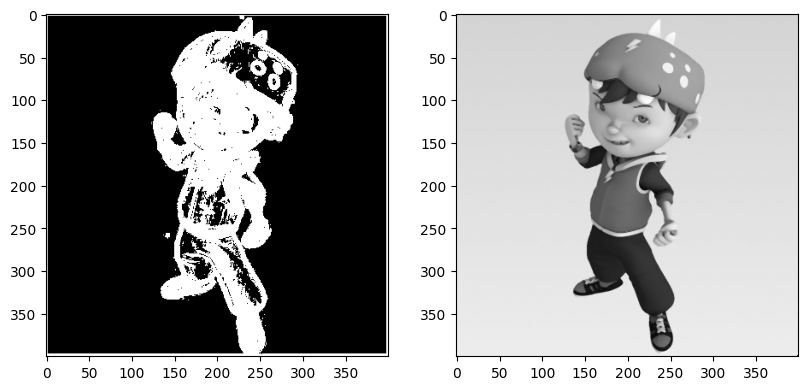

In [83]:
thresholding = threshold(prewittBoboiboy, thresh=4)
medianBoboiboy = cari_median(boboiboy_gray, k=3)

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(thresholding, cmap='gray')

plt.subplot(1,3,2)
plt.imshow(medianBoboiboy, cmap='gray')

In [84]:
def ekualisasi(input_gambar):
    histogram = [0] * 256
    tinggi, lebar = input_gambar.shape
    for row in input_gambar:
        for pixel in row:
            histogram[pixel] += 1

    cdf = [0] * 256
    total = 0
    for i in range(256):
        total += histogram[i]
        cdf[i] = total

    skala = 255 / (tinggi * lebar)
    transform_map = [int(round(c * skala)) for c in cdf]

    output_gambar = np.zeros_like(input_gambar)
    for i in range(tinggi):
        for j in range(lebar):
            output_gambar[i, j] = transform_map[input_gambar[i, j]]

    return output_gambar

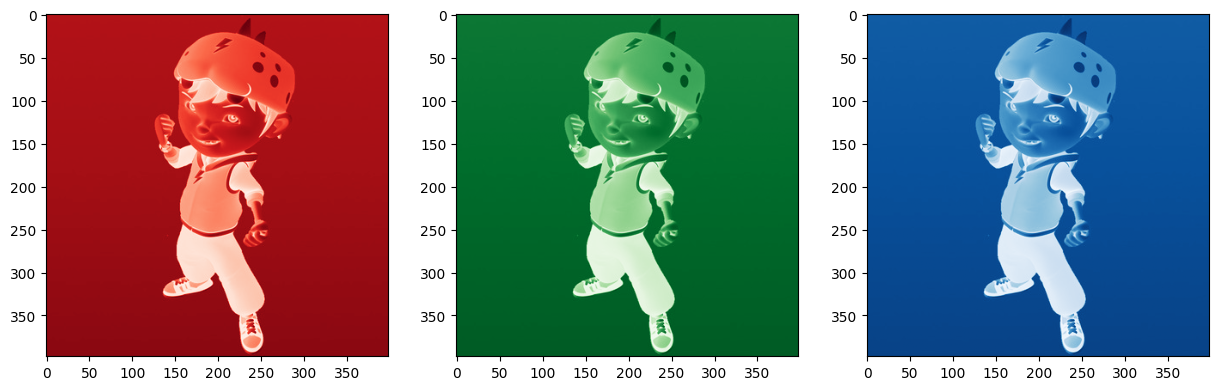

In [85]:
boboiboy_api = boboiboy_gray
boboiboy_angin = boboiboy_gray
boboiboy_air = boboiboy_gray

kernel_sharpen = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
sharpeningBoboiboy = np.array(apply_kernel(boboiboy_gray, kernel_sharpen, padding=0))

plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.imshow(sharpeningBoboiboy, cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(sharpeningBoboiboy, cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(sharpeningBoboiboy, cmap='Blues')

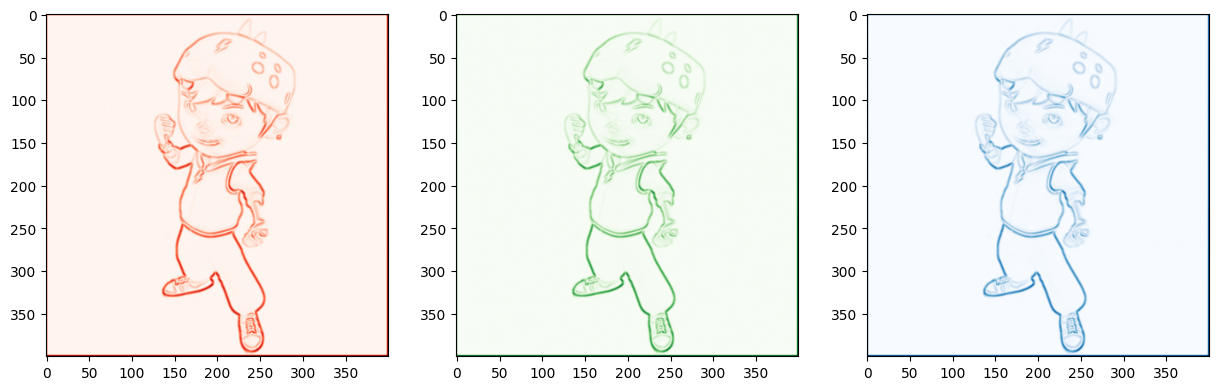

In [86]:
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.imshow(prewittBoboiboy, cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(prewittBoboiboy, cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(prewittBoboiboy, cmap='Blues')

In [87]:
def ekualisasi(input_gambar):
    histogram = [0] * 256
    tinggi, lebar = input_gambar.shape
    for row in input_gambar:
        for pixel in row:
            histogram[pixel] += 1

    cdf = [0] * 256
    total = 0
    for i in range(256):
        total += histogram[i]
        cdf[i] = total

    skala = 255 / (tinggi * lebar)
    transform_map = [int(round(c * skala)) for c in cdf]

    output_gambar = np.zeros_like(input_gambar)
    for i in range(tinggi):
        for j in range(lebar):
            output_gambar[i, j] = transform_map[input_gambar[i, j]]

    return output_gambar

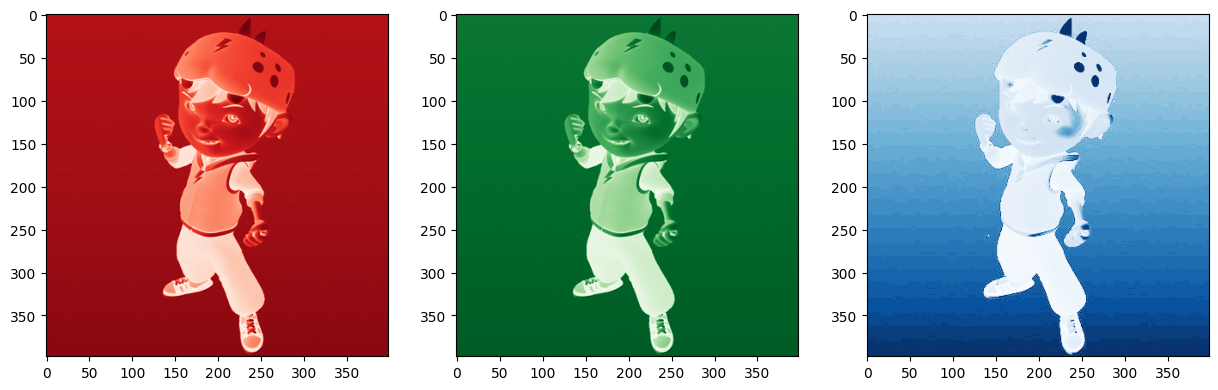

In [88]:
ekualisasiBoboiboy = ekualisasi(boboiboy_gray)

kernel_sharpen = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
sharpeningEkualisasiBoboiboy = np.array(apply_kernel(ekualisasiBoboiboy, kernel_sharpen, padding=0))

plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.imshow(sharpeningBoboiboy, cmap='Reds')
plt.subplot(1,3,2)
plt.imshow(sharpeningBoboiboy, cmap='Greens')
plt.subplot(1,3,3)
plt.imshow(sharpeningEkualisasiBoboiboy, cmap='Blues')

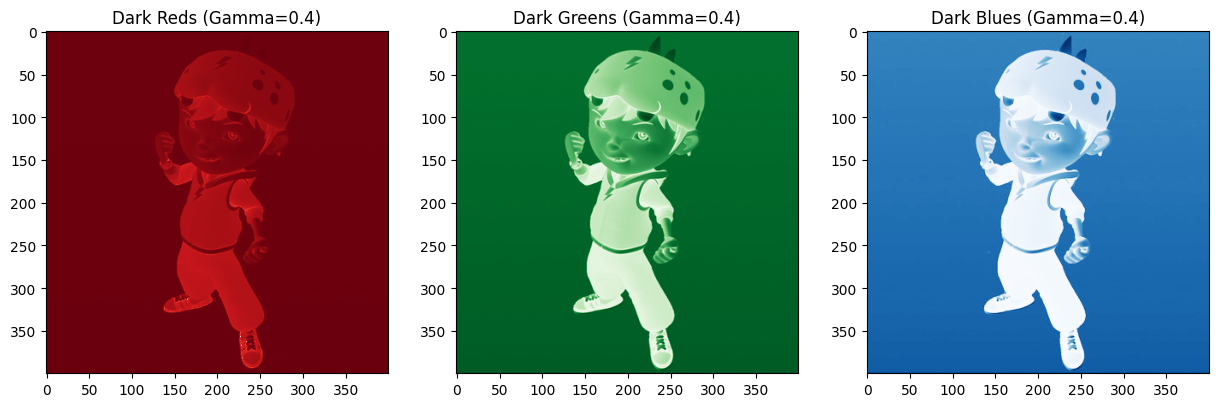

In [89]:
# 1. Baca gambar dan konversi ke grayscale
boboiboyColor = plt.imread('Assets/boboiboy.jpg')
boboiboyGray = cv.cvtColor(boboiboyColor, cv.COLOR_BGR2GRAY)

# 2. Normalisasi ke range 0-1 (untuk matplotlib colormap)
boboiboyGray_normalized = boboiboyGray / 255.0

# 3. Atur gamma untuk efek lebih gelap (semakin kecil semakin gelap)
gammaRed = 0.1  # Nilai antara 0.1-0.6 akan memberikan efek gelap yang baik
gammaGreen = 0.8
gammaBlue = 2

boboiboyGray_RED = np.power(boboiboyGray_normalized, gammaRed)
boboiboyGray_GREEN = np.power(boboiboyGray_normalized, gammaGreen)
boboiboyGray_BLUE = np.power(boboiboyGray_normalized, gammaBlue)

# 4. Terapkan colormap dengan versi gelap
cmap_red = plt.get_cmap('Reds')
cmap_green = plt.get_cmap('Greens')
cmap_blue = plt.get_cmap('Blues')

boboiboyDarkReds = cmap_red(boboiboyGray_RED)
boboiboyDarkGreens = cmap_green(boboiboyGray_GREEN)
boboiboyDarkBlues = cmap_blue(boboiboyGray_BLUE)

# 5. Simpan gambar (konversi ke 0-255 dan BGR format untuk OpenCV)
cv.imwrite('boboiboy_darkreds.png', (boboiboyDarkReds[:, :, :3] * 255).astype(np.uint8)[:, :, ::-1])
cv.imwrite('boboiboy_darkgreens.png', (boboiboyDarkGreens[:, :, :3] * 255).astype(np.uint8)[:, :, ::-1])
cv.imwrite('boboiboy_darkblues.png', (boboiboyDarkBlues[:, :, :3] * 255).astype(np.uint8)[:, :, ::-1])

# 6. Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(boboiboyDarkReds)
plt.title('Dark Reds (Gamma=0.4)')
plt.subplot(132)
plt.imshow(boboiboyDarkGreens)
plt.title('Dark Greens (Gamma=0.4)')
plt.subplot(133)
plt.imshow(boboiboyDarkBlues)
plt.title('Dark Blues (Gamma=0.4)')
plt.show()

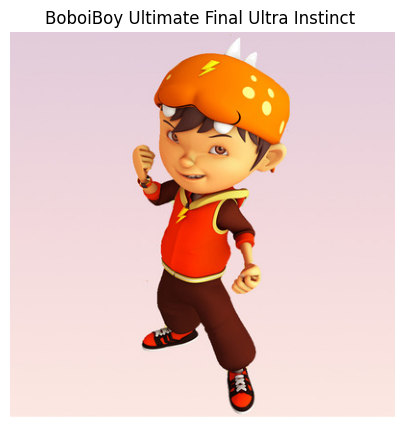

In [100]:
# Load gambar BoboiBoy dari referensi asli (yang dominan merah)
image = cv2.imread('Assets/boboiboy.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale untuk masking
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Buat mask threshold untuk pisahkan objek dan latar
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Perbesar aura (supaya seperti glow putih) menggunakan dilasi
kernel = np.ones((5, 5), np.uint8)
mask_dilated = cv2.dilate(mask, kernel, iterations=1)

# Buat latar putih
white_bg = np.full_like(image_rgb, 255)

# Gabungkan gambar dengan latar putih berdasarkan mask
fg = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_dilated)
bg = cv2.bitwise_and(white_bg, white_bg, mask=cv2.bitwise_not(mask_dilated))
final = cv2.add(fg, bg)

# Tampilkan hasil akhir
show_img("BoboiBoy Ultimate Final Ultra Instinct ", final, cmap_type=None)
